# Risk Ratios for Journalists

Welcome! This notebook will take you through the basics of understanding and working with risk ratios. A risk ratio is a formula that is useful across a wide variety of analyses, including vaccine effectiveness, pay-to-play meetings with politicians, employment discrimination, and TSA security screening. Although the formula is simple, there are  connections to deep topics like false positive rates, causal inferrence, and the important notion of conditional probability.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Example

A risk ratio, also called a relative risk, is the ratio of two probabilities. Each of these probabilities represents something happening to one of two groups, which are sometimes called the "exposed" and "unexposed" groups. For example, let's consider the probability of lung cancer for female smokers as compared to non-smokers. One [recent study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3296911/) reported the following numbers:



In [2]:
smokers = pd.DataFrame({'no cancer':[657,1902],'cancer':[485,609]}, index=['smoker','nonsmoker'])
smokers

,no cancer,cancer
smoker,657,485
nonsmoker,1902,609


We might naturally be interested in how much more likely a former smoker is to get cancer. There are various ways to express this mathematically, but one natural way is to examine the probability of developing cancer for each of the two groups.


In [3]:
p_cancer_given_smoker = smokers['cancer']['smoker'] / (smokers['cancer']['smoker'] + smokers['no cancer']['smoker'])
p_cancer_given_smoker

0.4246935201401051

In [4]:
p_cancer_given_nonsmoker = smokers['cancer']['nonsmoker'] / (smokers['cancer']['nonsmoker'] + smokers['no cancer']['nonsmoker'])
p_cancer_given_nonsmoker

0.24253285543608125

All we are doing here is calculating the percentage of smokers and non-smokers who got cancer, which is why we divide by the total number of smokers/non-smokers in the formulas above. We're using the notation `p_cancer_given_smoker` to mean "the probability of cancer given that someone is a smoker." This is the language of *conditional probability*, a key concept which we'll come back to.

From this, we can see that smokers have about a 42% of developing lung cancer, whereas non-smokers have a 24% chance. Clearly smoking is associated more strongly with cancer, but how should we quantify this? We might want to have a single number for a variety of reasons, such as to compare the effect of different risk factors -- is smoking more or less dangerous than never exercising? But it's also useful to have one number to summarize the risk, or rather, the *change in risk*, since in this sample there's a 24% chance of developing cancer even if you're a non-smoker.

The simplest way to do this would be to subtract the two probabilities:

In [5]:
p_cancer_given_smoker - p_cancer_given_nonsmoker

0.18216066470402384

This is a difference of probabilities, a number known as a *risk difference*. It's less commonly used, in part because a small risk difference can hide a big effect when an outcome is rare. If only 1% of the non-smokers in our example developed cancer while 5% did, then the risk difference would be 4% even though smokers are "five times as likely" to develop cancer. The phrase "times as likely" suggests a multiplication, and at last we come to the risk ratio:

In [6]:
p_cancer_given_smoker / p_cancer_given_nonsmoker

1.7510762382131426

We would say that smokers are "1.75 times as likely" to develop cancer than non-smokers.

## Definition

Given two groups and two outcomes, we can place these four numbers in a table like this:

| Group | Positive | Negative |
| - | - | - |
| Exposed | a | b |
| Unexposed | c | d |

Then the *risk ratio* is defined as `(a/(a+b)) / (c/(c+d))`. This is also sometimes called the *relative risk*.

Note that there is a closely related quantity called the *odds ratio* which is calculated as ratio of odds instead of a ratio of probabilities, that is `(a/b) / (c/d)`. Generally this is less used than the risk ratio but has advantages in [certain circumstances](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4640017/). 

# Exercise: COVID vaccine risk ratio

Here's a [paper](https://www.nejm.org/doi/full/10.1056/nejmoa2035389) which reports on the phase 3 clinical trials of the Moderna vaccine. What is the risk ratio that describes the effectiveness of this vaccine? You will need to read the paper to find the four values a,b,c,d as above.

In [7]:
a = 11 # number of people who DID get the vaccine and DID get COVID
b = 15210-11 # number of people who DID get the vaccine and DID NOT get COVID
c = 185 # number of people who DID NOT get the vaccine and DID get COVID
d = 15210-185 # number of people who DID NOT get the vaccine and DID NOT get COVID

In [8]:
# Then calculate the risk ratio itself
(a/(a+b)) / (c/(c+d))

0.05945945945945945

What does it mean that this number is smaller than 1?



A much lower percentage of people got COVID after vaccination

This paper says that the vaccine "showed 94.1% efficacy at preventing Covid-19 illness." Where does this number come from?

It's one minus the risk ratio, expressed as a percentage (times 100).

# Relative Risk in Pictures and Words
Pictures will help explain what's happening here, and how to write about these results.
We'll base our example on a type of drug that reduces heart attacks called statins, which have [similar numbers](https://researchaddict.com/statins-reduce-the-risk-of-death-heart-attacks-and-even-dementia/). Suppose that in a randomized trial we have 60 people in a control group, 3 of whom go on to have a heart attack, and 40 who take the drug, 1 of whom has a heart attack. We can draw this situation like this.

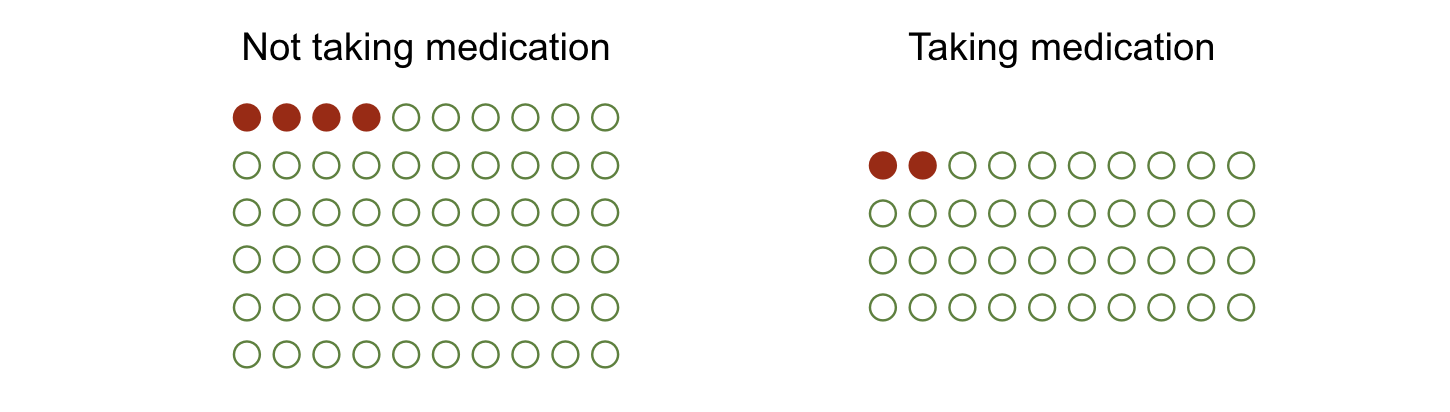


The probability of a heart attack if you are not taking the drug is 3/60 = 5%, while the probability of a heart attack if you are taking the drug is 1/40 = 2.5%. 

**The risk ratio, also called the relative risk, is (1/40)/(3/60) = 2.5%/5% = 0.5**

**The risk difference, also called the absolute risk reduction = (1/40) - (3/60) = 2.5%-5% = -2.5%**

The risk ratio is less than one, while risk difference is negative, both of which indicate that the risk was reduced.



## Wording for relative and absolute risk
How should we write about this? Relative risk is often written as *times as likely*, so in this case we could say "people who take this medicine are 0.5 times as likely to have a heart attack." 

In this case we could also go with a nice clean "half as likely," but *times* is the general case. Consider this sentence reporting a risk ratio from a 2015 [ProPublica story](https://www.propublica.org/article/deadly-force-in-black-and-white): "Young black males in recent years were at a far greater risk of being shot dead by police than their white counterparts – 21 times greater." 

You could also report the absolute risk reduction by saying "those who took the medication were 2.5% less likely to have a heart attack." This gives a different picture of what has happened to the risk. It has decreased by only a small amount, but that's because it *can't* decrease by more than the baseline of 5%.

Typically, a risk ratio is reported as *times as likely*, which implies a multiplication -- we are multiplying the risk of untreated group by the relative risk to find the risk of the treated group. Conversely, risk difference typically is reported as *less likely" or *more likely than* because it implies addition -- we add the risk difference to the untereated group to get the risk for the treated group.

You may be tempted to write "those who took the medication were 50% less likely to have a heart attack." This has a nice ring to it, and technically that 50% is a number called the **[relative risk reduction](https://en.wikipedia.org/wiki/Relative_risk_reduction)** which is just 1-risk ratio (if the risk ratio was 80% then the relative risk reduction would be 20%). However, this is confusing because "less likely" is usually used to report absolute risk reduction. Please don't do this.

Both risk ratios and risk differences are ways of summarizing a *change* in risk. They're very useful for comparing different interventions. However, neither of these numbers alone really tells the whole story.


## A simple and accurate way to report risk changes

In the heart attack example, the risk ratio was a large (far from one): people taking the medication were 0.5 times as likely to have a heart attack, or a 50% relative risk reduction. But the absolute risk reduction was small, just a few percent. This is because the absolute risk was small either way, but these two numbers can be a lot closer for common outcomes. If your probability of getting a parking ticket decreases from 70% to 30% in a different neighborhood, then the relative risk reduction is 1-30/70 = 57%, but the absolute risk reduction is 40%.

Beware of those who report [whichever number looks better](https://centerforhealthjournalism.org/2017/01/11/reporting-findings-absolute-vs-relative-risk)! A pharmacuetical company may pick the large number to report effectiveness, and the smaller number to report side effects. Another problem is that some writers might use "less likely" to report either a relative risk reduction or an absolute risk reduction. 

Confused yet? Fortunately, there's a simple alternative that will help both you and your readers. First, convert both the untreated and treated group to percentages, so readers don't have to work out the denominator in their heads. For our statin example that could be visualized like this:

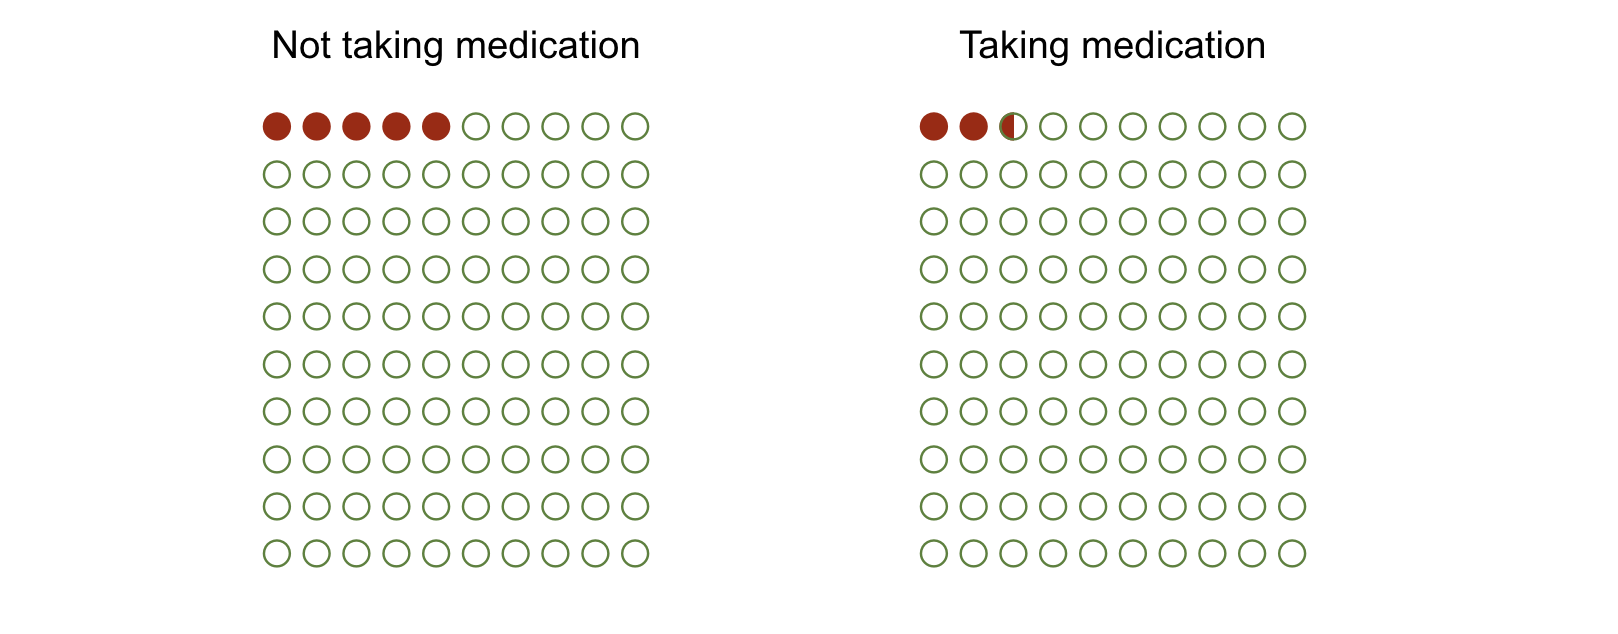

Then simply report both numbers: "Taking the medicine reduced the risk of heart attacks from 5% to 2.5%". 

While you would still want to use risk ratios to compare, say, the effectiveness of two different drugs, reporting the before and after percentages is simple, comprehensive, and easy to visualize.

# The Vaccine Adverse Event Reporting System (VAERS)
## When you want a risk ratio but there's just no way

One great advantage of getting comfortable with risk ratios is being able to recognize when something should really be a risk ratio, but isn't. 

The logic of the 2x2 table explains why the Vaccine Adverse Event Reporting System (VAERS) database cannot be used to calculate the number deaths caused by the COVID vaccine. To be clear, there are many problems with trying to use this data to count deaths. For one thing, it's an open database and only collects reports of "adverse reactions"*after* vaccinations -- no attempt is made to determine causality at this stage. As this [article](https://www.nebraskamed.com/COVID/does-vaers-list-deaths-caused-by-covid-19-vaccines) notes,

>VAERS is like the Wikipedia of data reporting. Anyone can report anything. Many reports are helpful. Some reports are nonsense – to prove the point, one anesthesiologist successfully submitted a VAERS report several years ago that the flu vaccine had [turned him into The Incredible Hulk](https://www.politifact.com/factchecks/2017/may/11/bill-zedler/bill-zedler-insists-program-doesnt-collect-wide-ra/). More recently, a [false report](https://www.usatoday.com/story/news/factcheck/2021/05/09/fact-check-no-evidence-2-year-old-died-covid-vaccine/4971367001/) of a 2-year-old dying from a COVID-19 vaccine was removed from VAERS because the CDC says it was "completely made up."

But even if every report was perfectly accurate, if you understand risk ratios you'll understand immediately that it's not possible to determine if vaccines increase the risk of death from this sort of data. Politifact [explains this well](https://www.politifact.com/article/2021/may/03/vaers-governments-vaccine-safety-database-critical/):

> Offit explained that four sets of data are needed to measure whether a vaccine has caused or contributed to an adverse event: vaccinated people who experienced that problem; vaccinated people who didn’t have it; unvaccinated people who had the problem; and unvaccinated people who didn’t.

In other words, VAERS tracks only one of the four numbers in the contingency table, so right away we know there's no way we can compute a relative risk of vaccination from this data alone. 


# Exercise: Clinton Foundation Meetings

In summer 2016 the [AP reported](https://apnews.com/article/82df550e1ec646098b434f7d5771f625) that "at least 85 of 154 people from private interests who met or had phone conversations scheduled with Clinton while she led the State Department donated to her family charity or pledged commitments to its international programs." Is this evidence that donating to the Clinton Foundation would get you a meeting with the Secretary of State?

In risk ratio terms, this would mean that the "risk" (probability) of getting a meeting for people who donated is higher than for those who did not donate, i.e. the risk ratio is greater than one. Let's try to calculate it.

In [ ]:
a = 85 # number of people who DID donate and DID get a meeting
b = ??? # number of people who DID donate and DID NOT get a meeting
c = 154-85 # number of people who DID NOT donate and DID get a meeting
d = ??? # number of people who DID NOT donate and DID NOT get a meeting

It turns out we cannot calculate the risk ratio. The basic problem is that we only have information on people who met with Clinton, not people who wanted to meet with her but did not, regardless of whether they also donated to the Clinton foundation. The fact that only two numbers are reported in the story should be a clue that we can't calculate the advantage of donating -- we need four numbers to do that. (We could also calculate the advantage with two probabilities: the probability of getting a meeting if you donated, and the probability of getting a meeting if you did not.)

But surely there's still something suspicious here if so many of the meetings she took were with donors, right? It depends! In particular, it depends on what you think the missing numbers might be. In 2016 I scraped the Clinton Foundation donors list and [found](http://jonathanstray.com/what-data-cant-tell-us-about-buying-politicians) there were 4277 donors. We can use this to fill in another entry in the table, expressing the missing value as `d`:

In [27]:
a = 85 # number of people who DID donate and DID get a meeting
b = 4277-(154-85) # number of people who DID donate and DID NOT get a meeting
c = 154-85 # number of people who DID NOT donate and DID get a meeting
# d = number of people who DID NOT donate and DID NOT get a meeting

In [28]:
# function to calculate risk ratio as a function of x, 
# the number of people who DID NOT donate and DID NOT get a meeting

def clinton_rr(d):
    return (a/(a+b)) / (c/(c+d))

Let's see what happens as `d`, the number of people who did not donate and didn't get a meeting either, increases. The plot looks mostly linear because we have to go quite a long way out to find risk ratios greater than one.

<AxesSubplot:xlabel='d'>

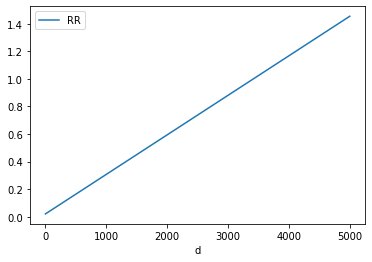

In [44]:
x = np.linspace(start=1, stop=5000, num=100)
data = pd.DataFrame({'d':x, 'RR':[clinton_rr(d) for d in x]})
data.plot(kind='line',x='d',y='RR')

In this case the risk ratio is smaller than one until d exceeds 4000 or so. Below that number, donation actually made your chances worse -- or more precisely, correlated with a lower probability of getting a meeting. We'll talk about causation a little later.

This result makes sense: we know that 85 people donated and got a meeting. The more people who wanteda meeting, did not donate and didn't get a meeting, the stronger the evidence that donation helps get a meeting. But since we don't know how many people fall into this category, it's difficult to say if donation actually helps.

# Exercise: Vaccine Effectivenes in Provincetown

# Relationship to Causality

# Coaches

Direct analysis

Suggest Logistic Regression

# Conditional Probability
Pictures

# TSA Screening Example
Or cancer screening example?

If the test is positive, what is the probabiity this person is actually carrying a terrorist?

Pictures to explain the problem, with conditional probability notation

# Bayes Theorem and The Base Rate Fallacy

Bayes Theorem
Uee it to solve the TSA example
Graph of P(terrorist|positive) vs P(positive|terrorist)


# What percentage of people with COVID are vaccinated?

real data from somewhere